Численное решение модели Изинга в интернете:

https://github.com/prtkm/ising-monte-carlo/blob/master/ising-monte-carlo.org

In [1]:
#from __future__ import division
import numpy as np
import time

def init_lattice(n):

    '''Create a nxn lattice with random spin configuration'''
    
    lattice = np.random.choice([1, -1], size=(n, n))
    return lattice


def deltaE(S0, Sn, J, H):

    '''Energy difference for a spin flip'''
    
    return 2 * S0 * (H + J * Sn)


def ising(n=200, 
          nsteps=500000,
          H=0,
          J=1,
          T=1,
          count_spins = False,
          countij = [1,1],
          correlation=False,
          corr_ij=[0,0],
          corr_r=1):

    '''Ising Model Simulator. If count_spins = True, only flipping behavior of 1 site is studied.'''
    
    lattice = init_lattice(n)
    energy = 0
    energies = []
    spins = []
    spin = np.sum(lattice)
    icount, jcount = countij
    counted_spins = [lattice[icount, jcount]]
    counted_intervals = []
    icorr, jcorr = corr_ij
    Sis = []
    SiSjs = []
    
    for step in range(nsteps):

        i = np.random.randint(n)
        j = np.random.randint(n)

        # Periodic Boundary Condition
        Sn = lattice[(i - 1) % n, j] + lattice[(i + 1) % n, j] + \
             lattice[i, (j - 1) % n] + lattice[i, (j + 1) % n]

        dE = deltaE(lattice[i, j], Sn, J, H)

        if dE < 0 or np.random.random() < np.exp(-dE/T):
            lattice[i, j] = -lattice[i, j]
            energy += dE
            energies.append(energy)
         # Note that the spin is collected at every step
            spin += 2*lattice[i, j]
        
        if count_spins:
            ispin = lattice[icount, jcount]
            if ispin != counted_spins[-1]:
                counted_spins.append(ispin)
                counted_interval = step - sum(counted_intervals)

                counted_intervals.append(counted_interval)
        if correlation:
            Sn_corr = lattice[(icorr - corr_r) % n, jcorr] + lattice[(icorr + corr_r) % n, jcorr] + \
                      lattice[icorr, (jcorr - corr_r) % n] + lattice[icorr, (jcorr + corr_r) % n]
            Si = lattice[icorr, jcorr]
            SiSj = Si * Sn_corr / 4.0
            Sis.append(Si)
            SiSjs.append(SiSj)
            
        spins.append(spin)


    if correlation:
        return Sis, SiSjs
    
    if count_spins:
        return counted_spins, counted_intervals
        
    return lattice, energies, spins

In [2]:
#time_now = time.time()
#lattice, energies, spins = ising(n=100, 
#          nsteps=100000,
#          H=0,
#          J=1,
#          T=1,
#          count_spins = False,
#          countij = [1,1],
#          correlation=False,
#          corr_ij=[0,0],
#          corr_r=1)
#print("--- seconds ---", time.time() - time_now)

In [13]:
#Energies from temperature in array np.linspace(2.5, 5.0, 17)

global_energies = []

for TT in np.linspace(2.5, 5.0, 17):
    global_energies.append(np.load("./energies_" + str(TT) + ".npy"))




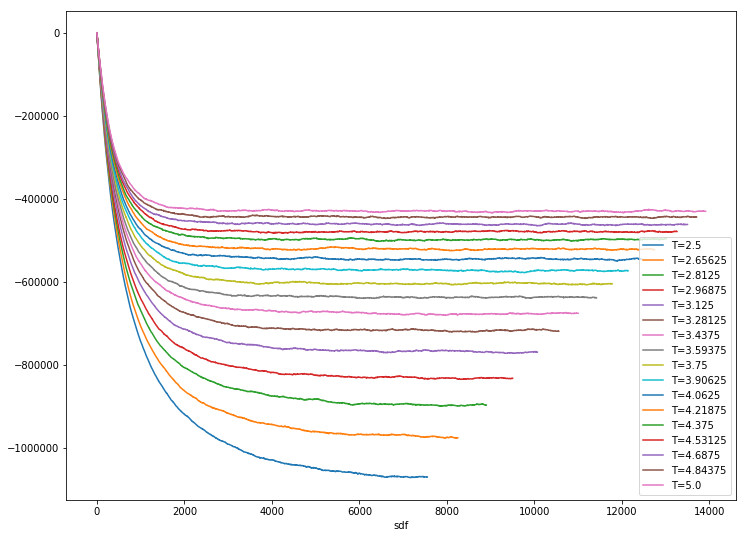

In [15]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 9))

temerature = np.linspace(2.5, 5.0, 17)

for i in range(len(global_energies)):
    plt.plot(global_energies[i], label="T=" + str(temerature[i]))


plt.legend()
plt.xlabel("Step")
plt.ylabel("Energy")

plt.show()

In [16]:
T = np.linspace(2.5, 5, 17)

E = [i[-1] for i in global_energies]

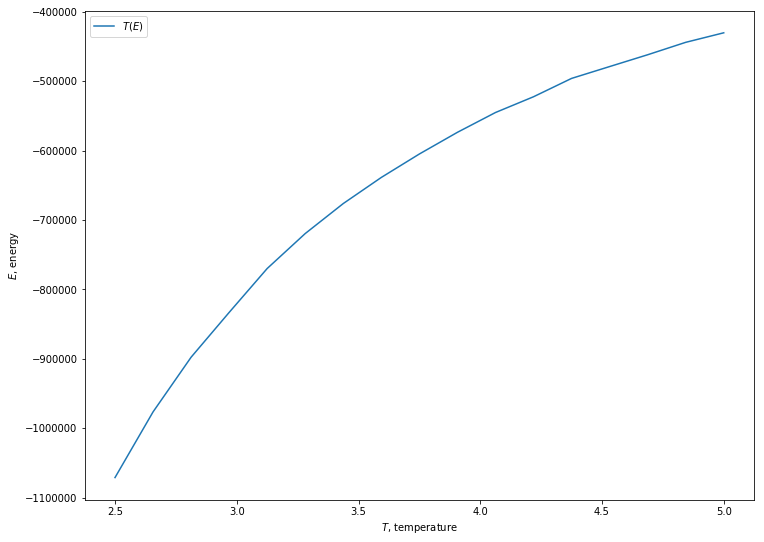

In [19]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 9))

plt.plot(T, E, label="$T(E)$")


plt.legend()
plt.xlabel("$T$, temperature")
plt.ylabel("$E$, energy")

plt.show()